In [1]:
from utils import *
from dataset import *
from autoencoder import *

In [54]:
data = StepFunctionEventsDataset(4096,[1, 0.5, 0.25])

In [55]:
loader = DataLoader(data, batch_size=1024, shuffle=True)

In [60]:
model = Autoencoder(40, 32, 1, 1, lam = 0.0025)
trainer = pl.Trainer(max_epochs=50)
trainer.fit(model, loader)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name    | Type          | Params
------------------------------------------
0 | encoder | MLP           | 4.7 K 
1 | decoder | MLP           | 2.2 K 
2 | code    | NaiveEncoding | 0     
------------------------------------------
6.9 K     Trainable params
0         Non-trainable params
6.9 K     Total params
0.028     Total estimated model params size (MB)
/opt/anaconda3/envs/pvae/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.
/opt/anaconda3/envs/pvae/lib/python3.11/site-packages/pytorch_lightning/loops/fit_loop.py:293: The number of training batches (4) is smaller than the logging interval Train

Epoch 49: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 12.95it/s, v_num=42]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 49: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 12.72it/s, v_num=42]


In [61]:
# Testing data, currently just the training data
test_loader = DataLoader(data, batch_size=4096)
test_batch = next(iter(test_loader))
model.eval()
with torch.no_grad():
    model.encode(test_batch['event_list'])
    z = model.latent.cpu().numpy()


In [62]:
# from sklearn.manifold import TSNE

# # Apply t-SNE
# tsne = TSNE(n_components=2, random_state=42)
# embedding = tsne.fit_transform(z)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
embedding = pca.fit_transform(z)

# embedding = z


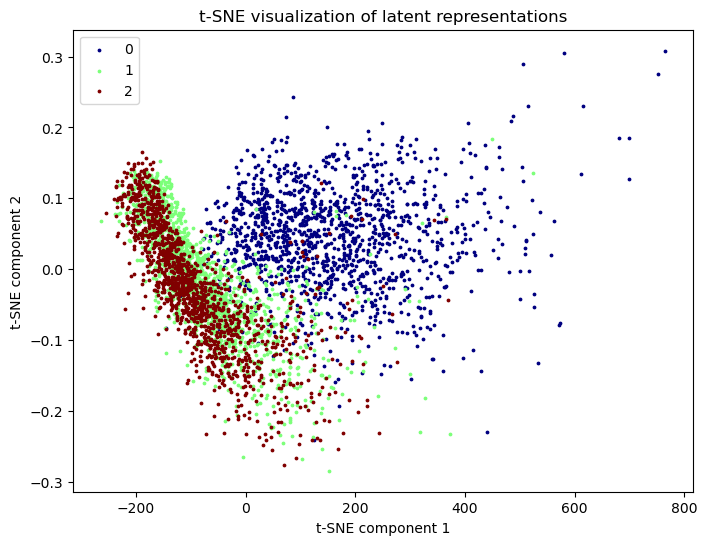

In [63]:
labels = test_batch['type'].numpy()
unique_labels = np.unique(labels)
colors = plt.cm.jet(np.linspace(0, 1, len(unique_labels)))

plt.figure(figsize=(8, 6))
for i, label in enumerate(unique_labels):
    idx = labels == label
    plt.scatter(embedding[idx, 0], embedding[idx, 1], color=colors[i], label=label, marker='o',s=3)

plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.legend(loc='best')
plt.title('t-SNE visualization of latent representations')
plt.show()

In [8]:
z

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]], dtype=float32)